## Проверочный проект по supervised learning
Отток клиентов в компании интернет-провайдере

План:
1. EDA (exploraty data analysis)
2. Когортный анализ клиентов
3. Предиктивные модели

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

Целевая переменная - churn - отток посетителей:
- No - остались
- Yes - ушли

Описание колонок:


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/DATA/Telco-Customer-Churn.csv')

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Распределение оттока по гендеру

<Axes: xlabel='gender', ylabel='count'>

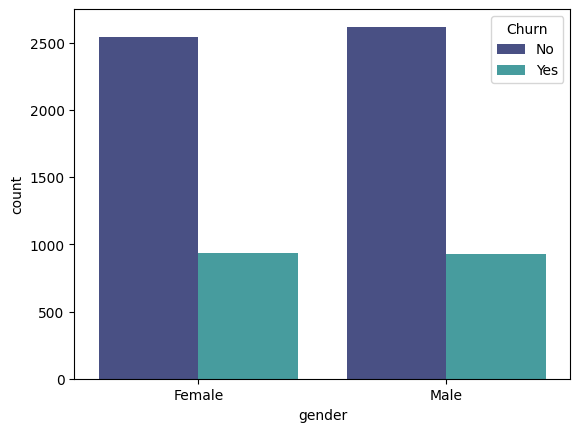

In [ ]:
sns.countplot(data = df, x='gender', palette='mako', hue='Churn')

Распределние по контракту

<Axes: xlabel='Contract', ylabel='count'>

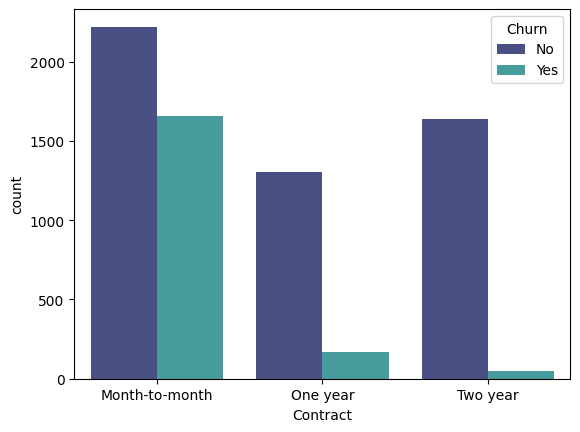

In [ ]:
sns.countplot(data = df, x='Contract', palette='mako', hue='Churn')

In [ ]:
#df[(df['gender'] == 'Male') & (df['Churn'] == 'No')]

In [ ]:
#sns.scatterplot(data=df, y='MonthlyCharges', x=range(1, len(df)+1), hue='Churn')

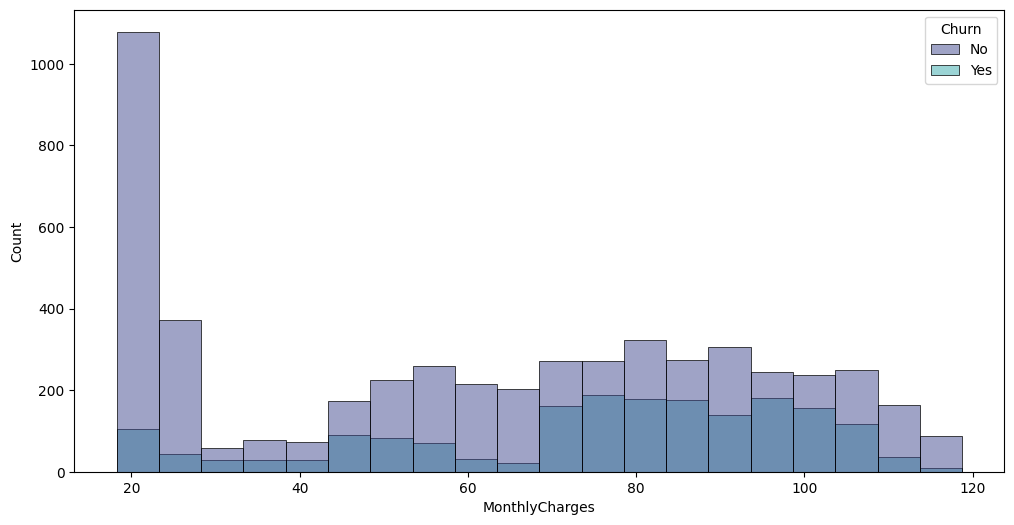

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn',palette='mako', bins=20, linewidth=0.5)
plt.show()

/tmp/ipython-input-2747579077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='MonthlyCharges', x='Churn',  palette='mako')


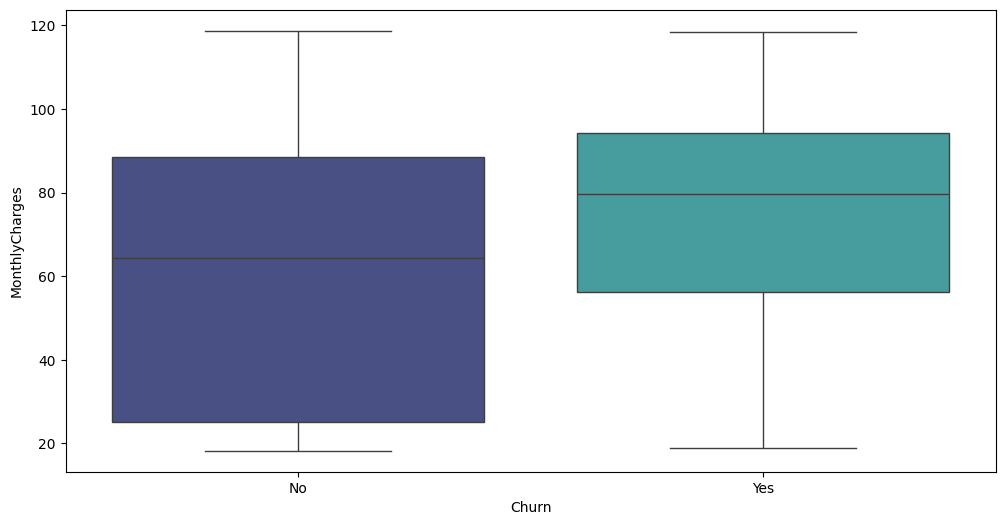

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
sns.boxplot(data=df, y='MonthlyCharges', x='Churn',  palette='mako')
plt.show();

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Посмотрим на корреляцию между признаками. Многие переменные являются категориальными, поэтому воспользуемся метод get_dummy

In [ ]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]).corr(numeric_only=True)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df_corr = corr_df['Churn_Yes'].sort_values().drop(['Churn_No', 'Churn_Yes'], axis=0)

/tmp/ipython-input-2971678997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_corr, palette='husl')


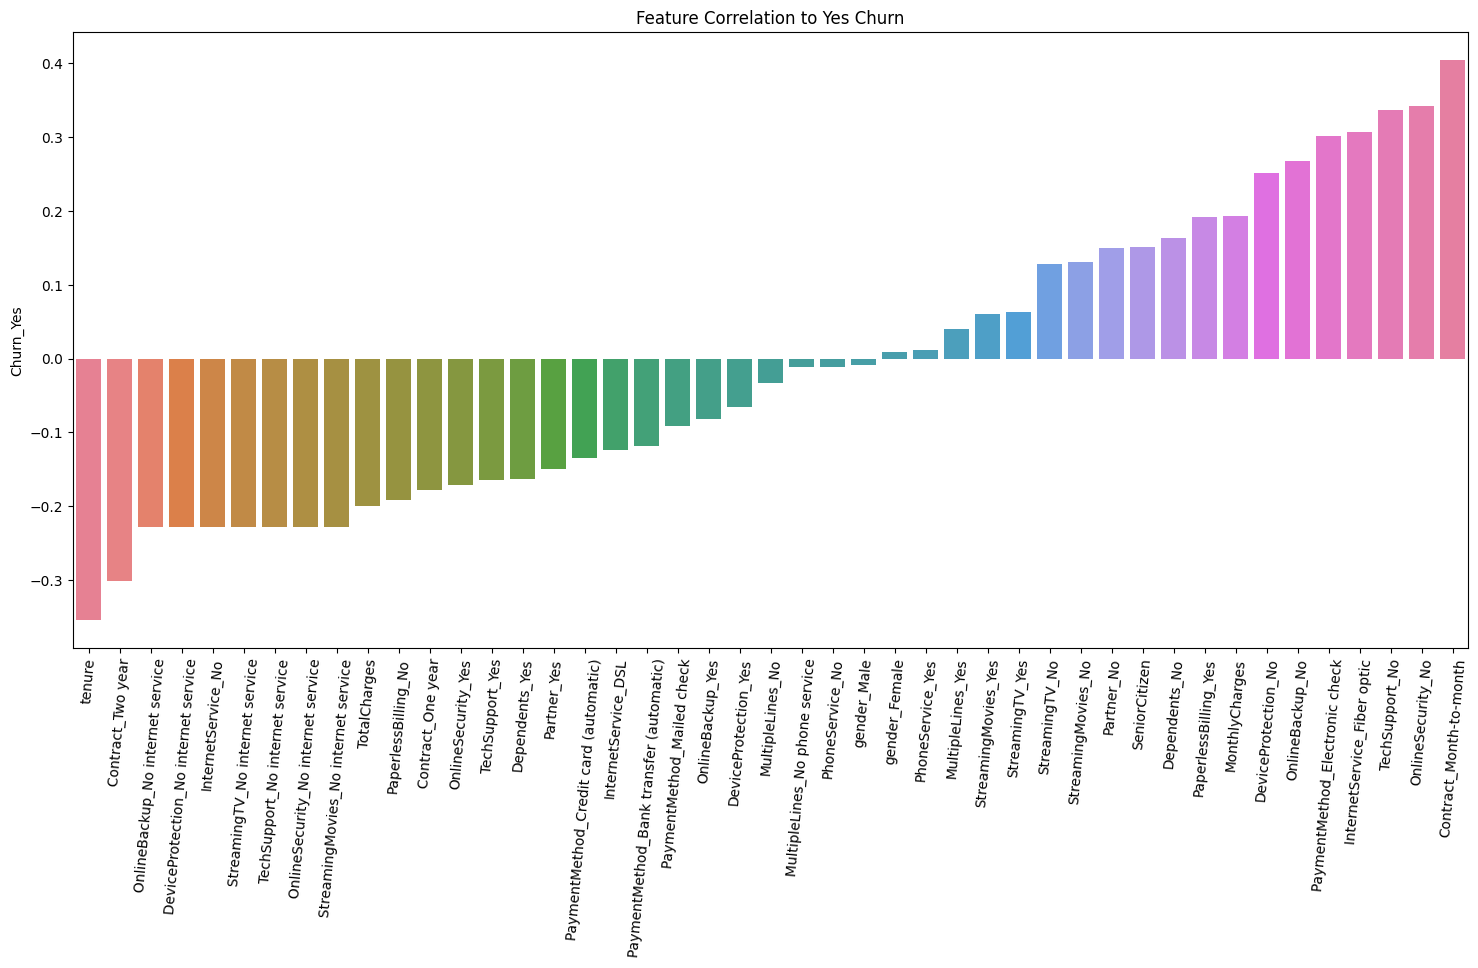

In [ ]:
plt.figure(figsize=(18, 8))
sns.barplot(df_corr, palette='husl')
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=85);

In [ ]:
#dff = pd.read_csv('/content/drive/MyDrive/data/DATA/Telco-Customer-Churn.csv')

### Анализ оттока
Мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами

tenure - продолжительность контракта (в месяцах)

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df['tenure'].sort_values()

,tenure
3935,1
3936,1
3836,1
6958,1
5576,1
...,...
7026,72
7028,72
28,72
5410,72


Гистограмма с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.

In [ ]:
df[['tenure', 'Churn']]

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes
...,...,...
7027,24,No
7028,72,No
7029,11,No
7030,4,Yes


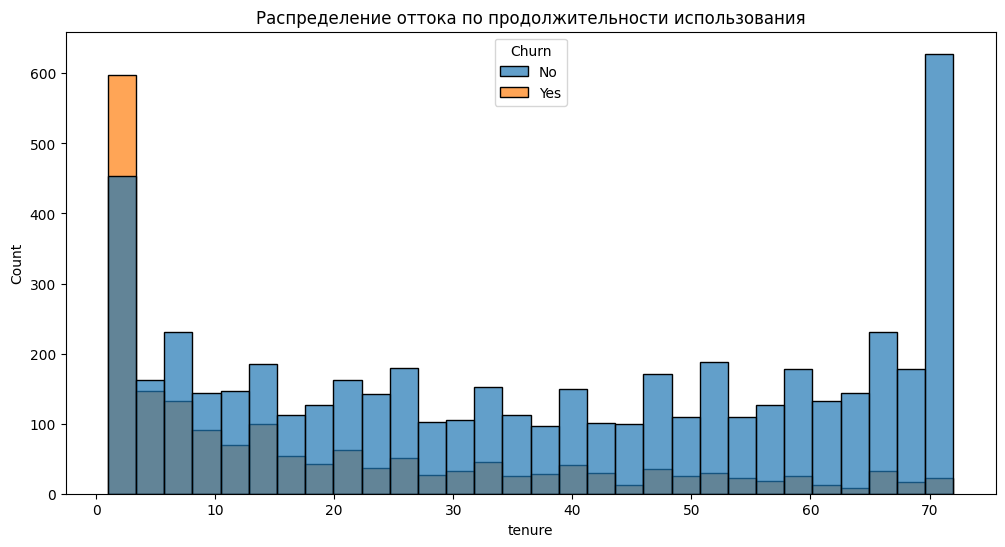

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
sns.histplot(data = df, x = 'tenure', bins=30, hue='Churn', alpha=0.7)
plt.title('Распределение оттока по продолжительности использования')

plt.show()

Гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract

/tmp/ipython-input-505145264.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = df, x='tenure', row='Churn', col ='Contract', palette='husl', bins=30)


<Figure size 1200x600 with 0 Axes>

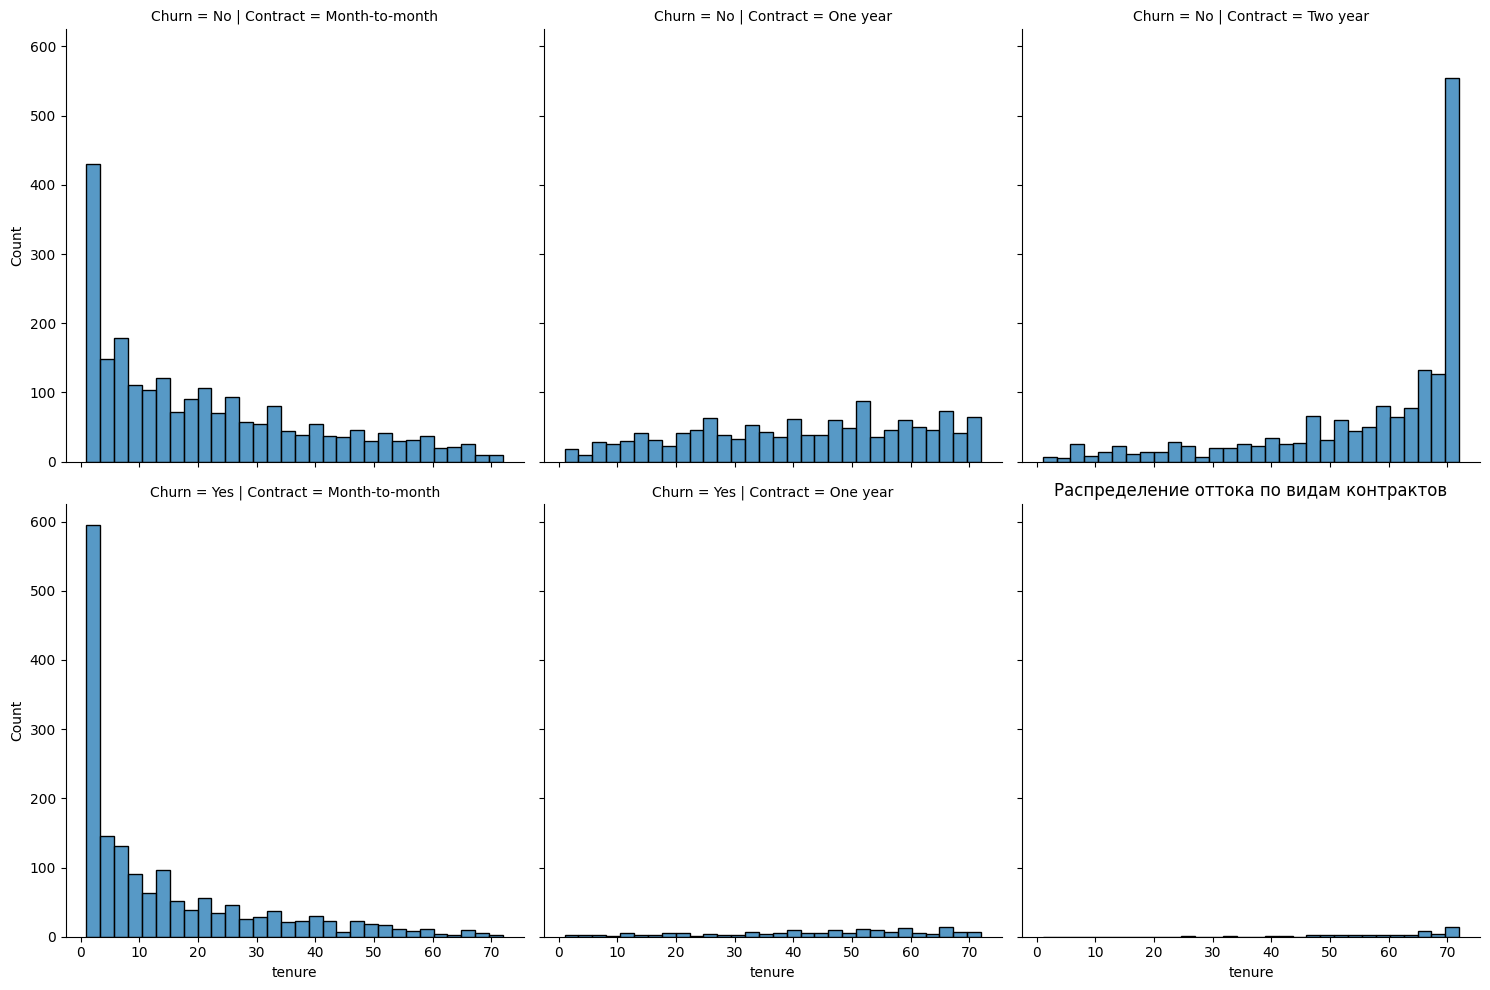

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
sns.displot(data = df, x='tenure', row='Churn', col ='Contract', palette='husl', bins=30)
plt.title('Распределение оттока по видам контрактов')
plt.show()

In [ ]:
df.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

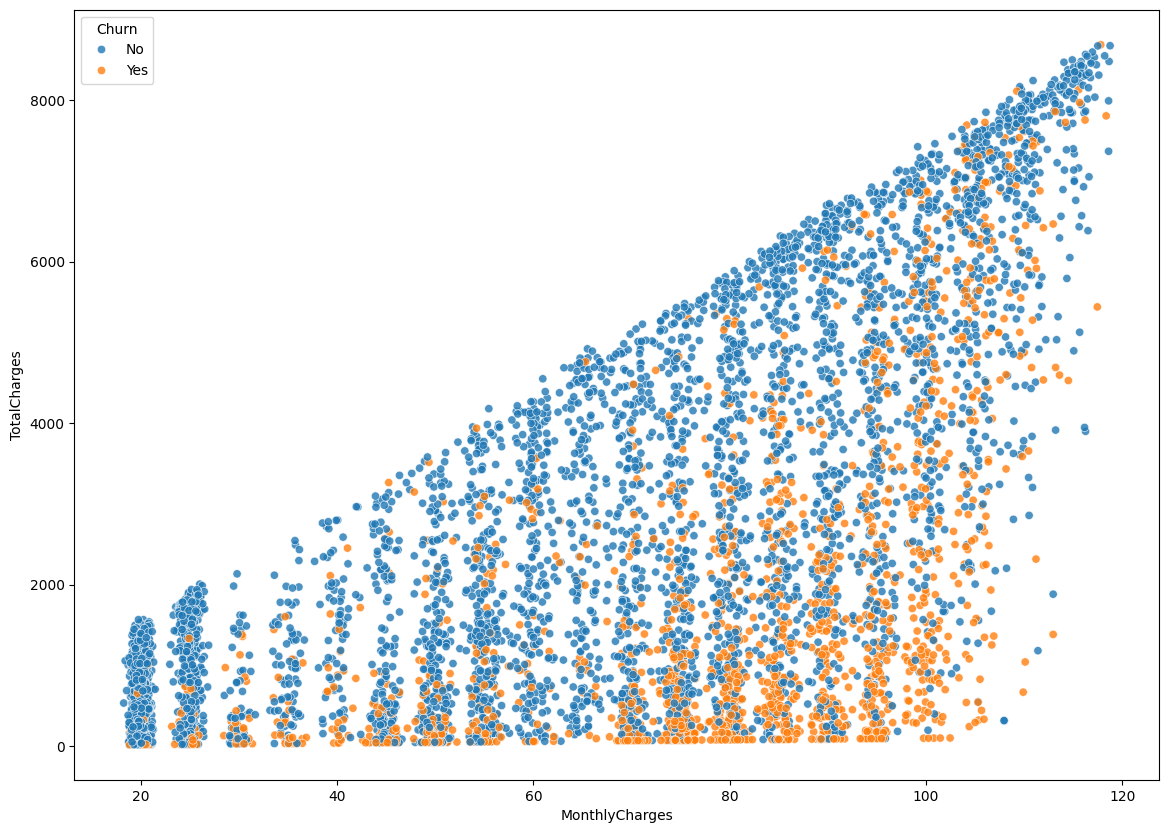

In [ ]:
plt.figure(figsize=(14,10), dpi=100)
sns.scatterplot(data = df, y='TotalCharges', x='MonthlyCharges', hue='Churn', alpha=0.8)

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

Для каждого уникального значения колонки tenure в качестве когорты, вычисляем процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [ ]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


In [ ]:
сhurn_count = df[['tenure', 'Churn']][df['Churn'] == 'Yes'].groupby('tenure').count()
all_churn = df[['tenure', 'Churn']].groupby('tenure').count()
summary = сhurn_count/all_churn*100

In [ ]:
summary

,Churn
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


/tmp/ipython-input-1327828883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['Churn'], palette='mako')


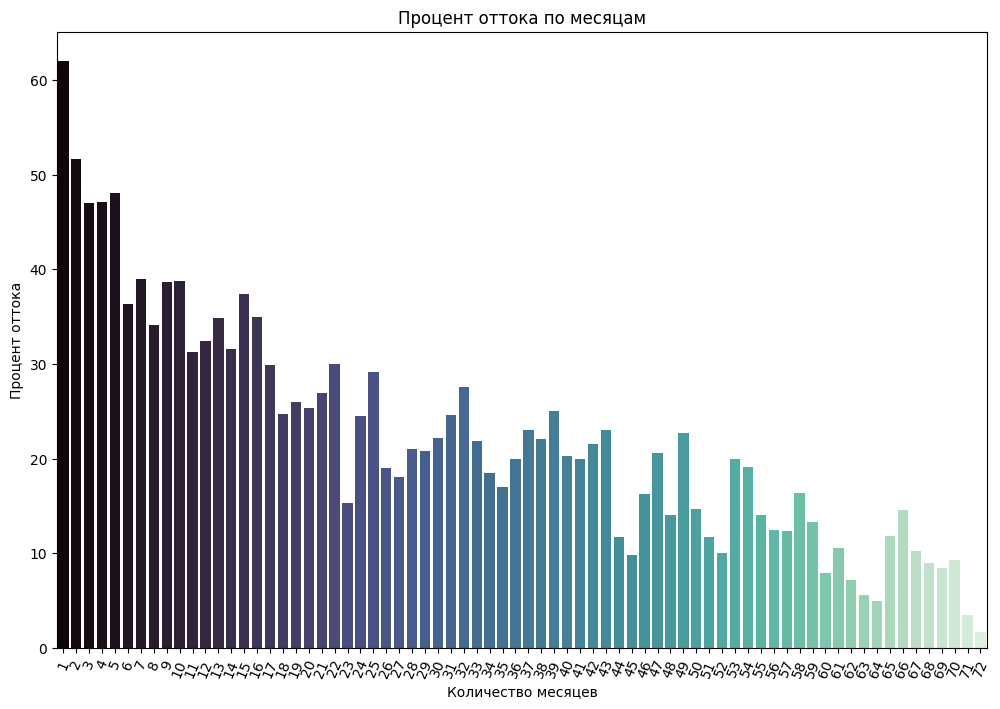

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.barplot(x=summary.index, y=summary['Churn'], palette='mako')

plt.title('Процент оттока по месяцам')
plt.ylabel('Процент оттока')
plt.xlabel('Количество месяцев')
plt.xticks(rotation=67);

Более крупные сегменты:
 На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'

In [ ]:
def tenure_cohort(tenure):
  if tenure >= 0 and tenure <= 12:
    return '0-12 Months'
  elif tenure > 12 and tenure <= 24:
    return '12-24 Months'
  elif tenure >24 and tenure <= 48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

In [ ]:
df['Tenure Cohort'] = df['tenure'].apply(tenure_cohort)

In [ ]:
df[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

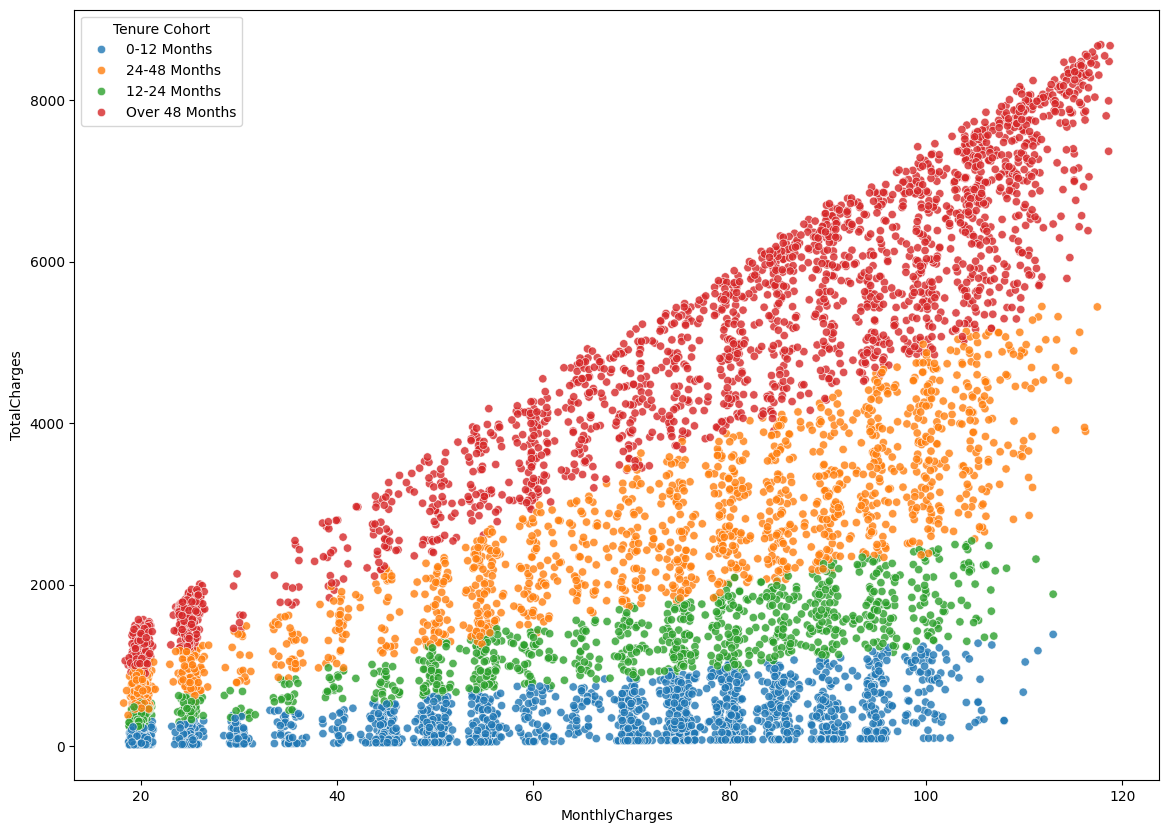

In [ ]:
plt.figure(figsize=(14,10), dpi=100)
sns.scatterplot(data = df, y='TotalCharges', x='MonthlyCharges', hue='Tenure Cohort', alpha=0.8)

<Axes: xlabel='Tenure Cohort', ylabel='count'>

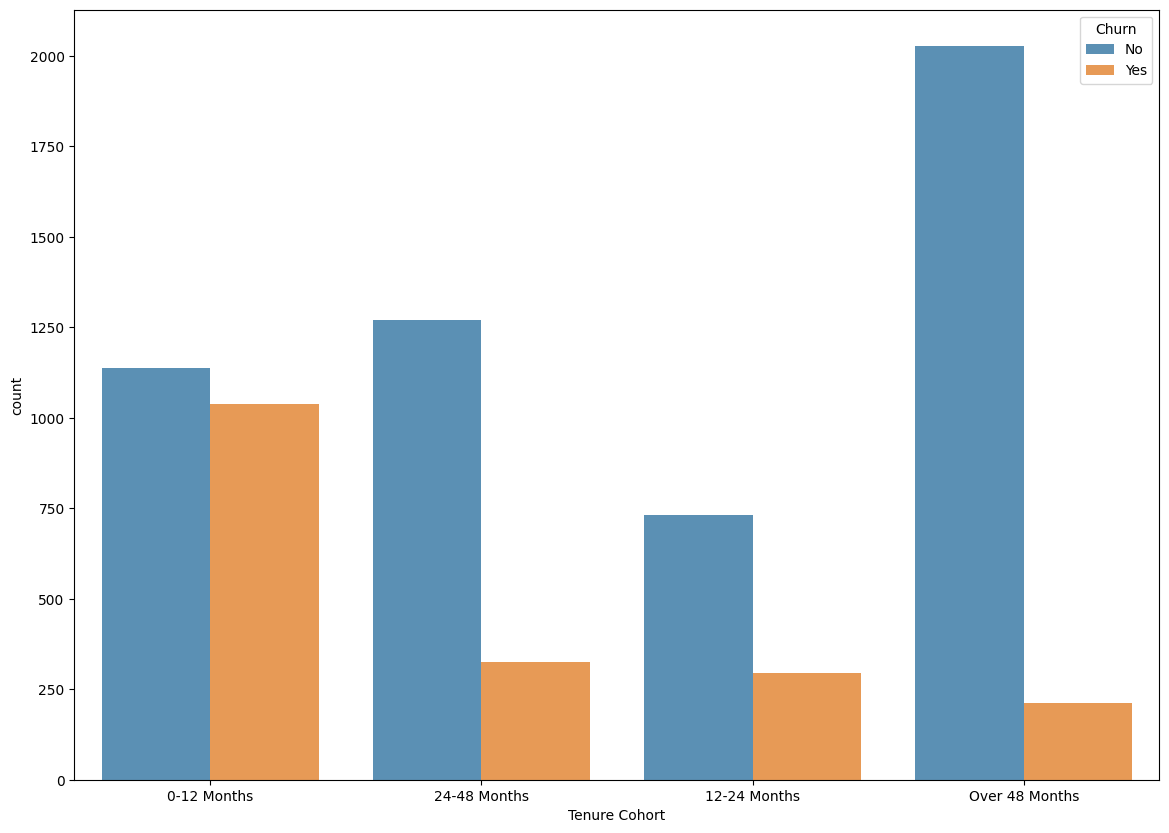

In [ ]:
plt.figure(figsize=(14,10), dpi=100)
sns.countplot(data = df, x='Tenure Cohort', hue='Churn', alpha=0.8)

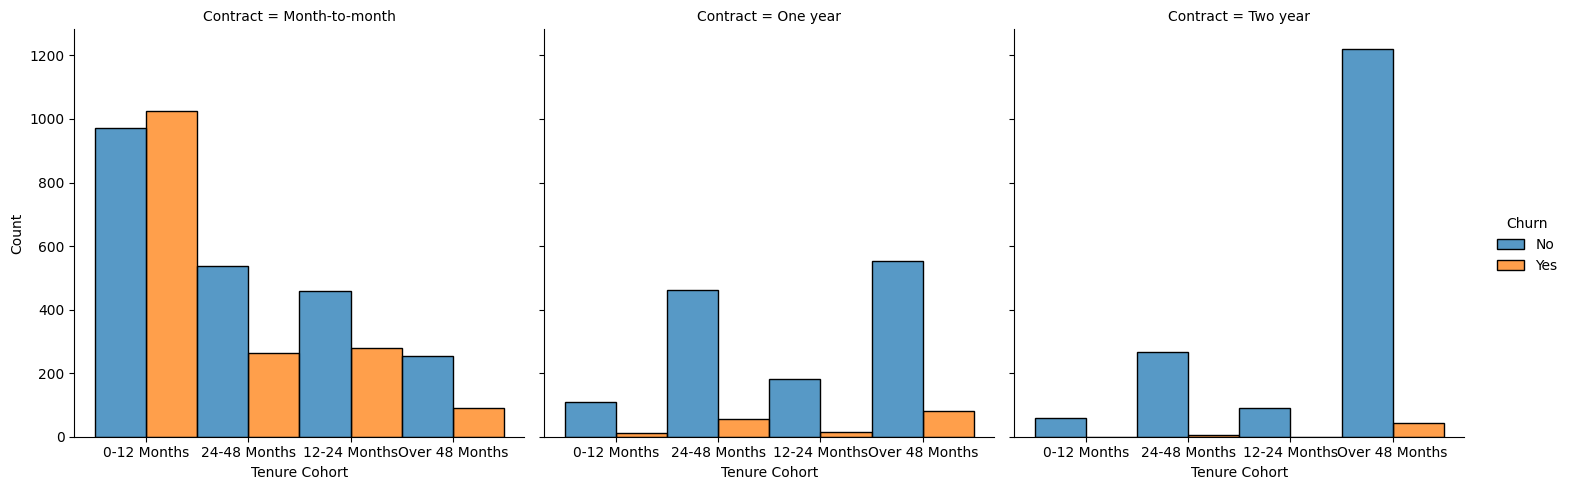

In [ ]:
sns.displot(data=df, x='Tenure Cohort', hue='Churn', col ='Contract', multiple='dodge')

## Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. (supervised learning models) и сравнить результаты!**
/

Почему то я зациклилась на этом customer Id и что с ним делать (как исключать из dummy и тд), а ведь достаточно здраво взглянуть на то для чего мы их берем и как их вообще используем

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1), drop_first=True)

In [ ]:
#X

In [ ]:
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



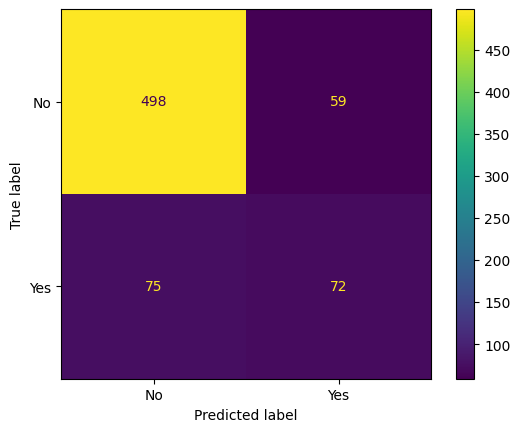

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

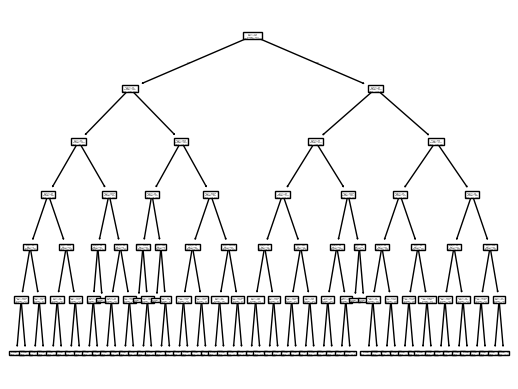

In [ ]:
plot_tree(dt);

In [ ]:
from sklearn.model_selection import GridSearchCV

ту мач

In [ ]:
param_grid = {'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [ ]:
gridtree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

In [ ]:
gridtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
gridtree.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [ ]:
#gridtree.cv_results_

In [ ]:
y_pred = gridtree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



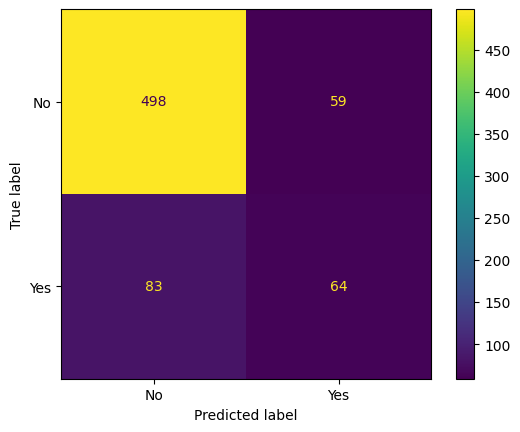

In [ ]:
ConfusionMatrixDisplay.from_estimator(gridtree, X_test, y_test)

In [ ]:
gridtree.best_estimator_.tree_

Результат: слабовато, но и классы у нас несбалансированы.

In [ ]:
#df['Churn'].value_counts()

In [ ]:
from sklearn.model_selection import cross_val_score

# Проверим оба варианта с той же кросс-валидацией
dt_depth5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_depth6 = DecisionTreeClassifier(max_depth=6, random_state=42)

scores_5 = cross_val_score(dt_depth5, X_train, y_train, cv=5, scoring='accuracy')
scores_6 = cross_val_score(dt_depth6, X_train, y_train, cv=5, scoring='accuracy')

print(f"max_depth=5: {scores_5.mean():.3f} ± {scores_5.std():.3f}")
print(f"max_depth=6: {scores_6.mean():.3f} ± {scores_6.std():.3f}")

max_depth=5: 0.790 ± 0.009
max_depth=6: 0.785 ± 0.004


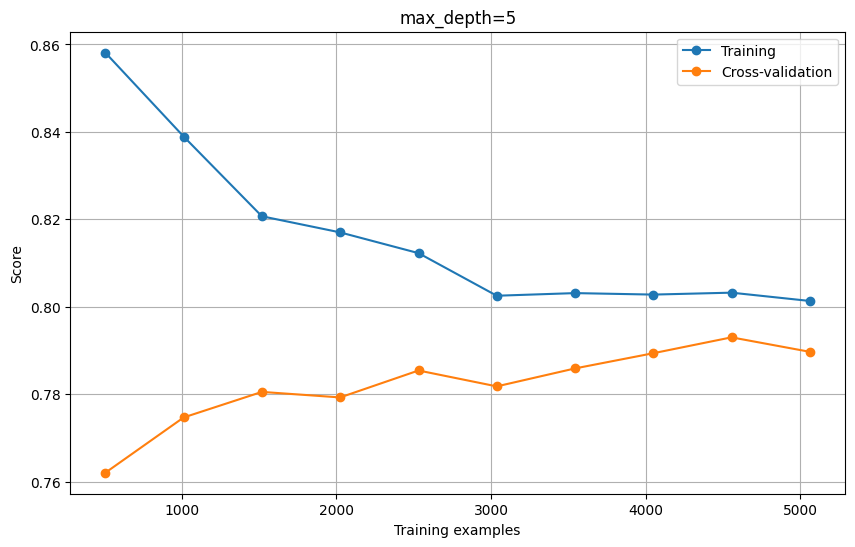

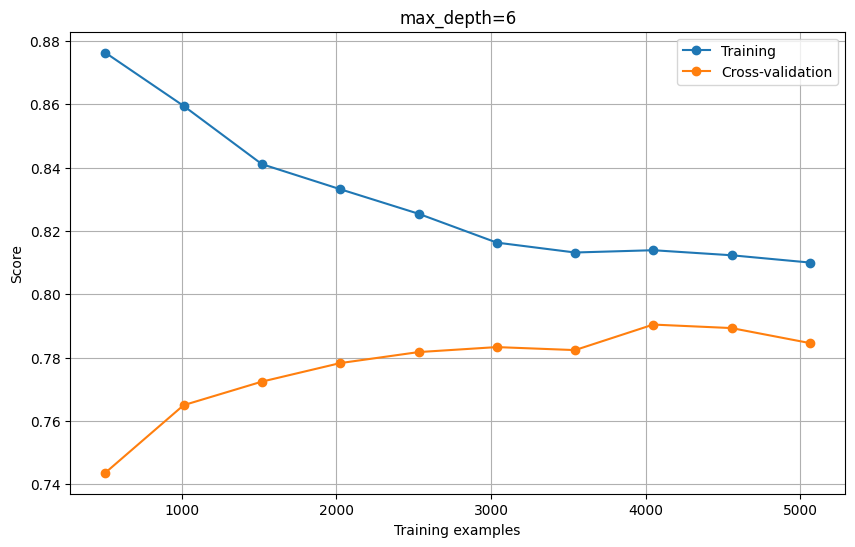

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

# Сравнить оба варианта
plot_learning_curve(dt_depth5, "max_depth=5", X_train, y_train)
plot_learning_curve(dt_depth6, "max_depth=6", X_train, y_train)

### Случайные леса

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators':[64,100,128,200],
              'max_features':[2,3,4],
              'bootstrap':[True, False],
              'oob_score':[True, False]}

In [ ]:
grid_rfc = GridSearchCV(rfc, param_grid, cv=5)

In [ ]:
grid_rfc.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueError("Out of bag

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64, 'oob_score': True}

In [ ]:
y_rfc_pred = grid_rfc.predict(X_test)

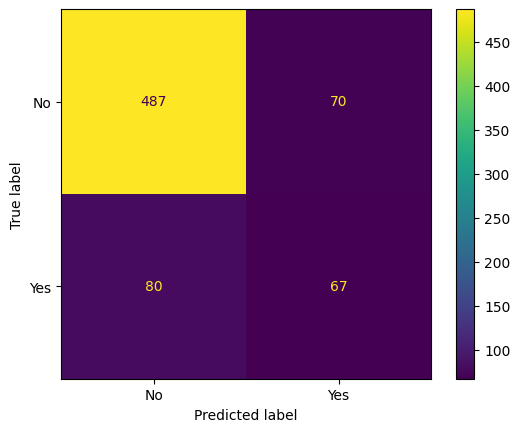

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_rfc, X_test, y_test)

In [ ]:
confusion_matrix(y_test, y_rfc_pred)

array([[487,  70],
       [ 80,  67]])

In [ ]:
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       557
         Yes       0.49      0.46      0.47       147

    accuracy                           0.79       704
   macro avg       0.67      0.67      0.67       704
weighted avg       0.78      0.79      0.78       704



Снова не очень хорошие результаты еклмн


### AdaBoost - адаптивный бустинг

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# гиперпараметры
# best_estimator - любая модель ml (но база - это decision tree с max_depth=1)
# n_estimator - сколько создавать таких деревьев

# начнем с очень простого n_estimator=1 - модель ищет только 1 самый лучший признак
boost_model = AdaBoostClassifier(n_estimators=20)

In [ ]:
boost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

In [ ]:
preds_boost = boost_model.predict(X_test)

In [ ]:
print(classification_report(y_test, preds_boost))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90       557
         Yes       0.64      0.42      0.51       147

    accuracy                           0.83       704
   macro avg       0.75      0.68      0.70       704
weighted avg       0.81      0.83      0.82       704



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

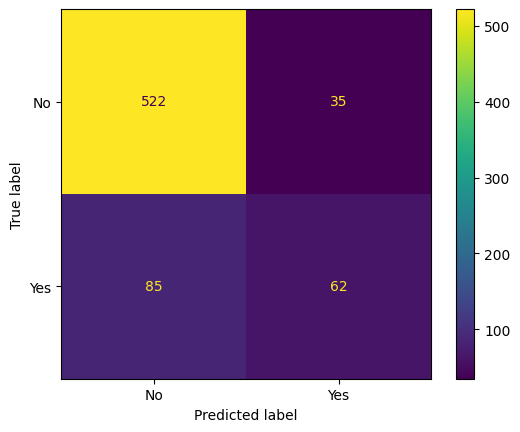

In [ ]:
ConfusionMatrixDisplay.from_estimator(boost_model, X_test, y_test)

In [ ]:
# цикл для визуализации ошибки
error_rates = []

for n in range(1,96):
  boost_model = AdaBoostClassifier(n_estimators=n)
  boost_model.fit(X_train, y_train)
  predicts = boost_model.predict(X_test)

  error = 1 - accuracy_score(y_test, predicts)

  error_rates.append(error)

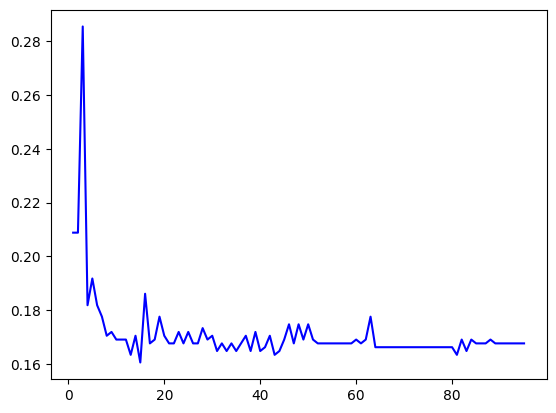

In [ ]:
plt.plot(range(1, 96), error_rates, 'b')

In [ ]:
boost_model.feature_importances_

array([0.        , 0.4908279 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02814759, 0.        ,
       0.11368677, 0.        , 0.03382479, 0.        , 0.05880229,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02506803, 0.        , 0.        , 0.038412  ,
       0.10497916, 0.03021577, 0.        , 0.0760357 , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
feats = pd.DataFrame(index=X.columns, data=boost_model.feature_importances_, columns=['Важность'])

In [ ]:
imp_feats = feats[feats['Важность']>0].sort_values('Важность')

In [ ]:
imp_feats['Важность']

,Важность
StreamingTV_Yes,0.025068
MultipleLines_No phone service,0.028148
PaperlessBilling_Yes,0.030216
OnlineSecurity_No internet service,0.033825
Contract_One year,0.038412
OnlineBackup_No internet service,0.058802
PaymentMethod_Electronic check,0.076036
Contract_Two year,0.104979
InternetService_Fiber optic,0.113687
tenure,0.490828


Важность признаков

/tmp/ipython-input-943084956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = imp_feats, y='Важность', x=imp_feats.index, palette='cubehelix')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'StreamingTV_Yes'),
  Text(1, 0, 'MultipleLines_No phone service'),
  Text(2, 0, 'PaperlessBilling_Yes'),
  Text(3, 0, 'OnlineSecurity_No internet service'),
  Text(4, 0, 'Contract_One year'),
  Text(5, 0, 'OnlineBackup_No internet service'),
  Text(6, 0, 'PaymentMethod_Electronic check'),
  Text(7, 0, 'Contract_Two year'),
  Text(8, 0, 'InternetService_Fiber optic'),
  Text(9, 0, 'tenure')])

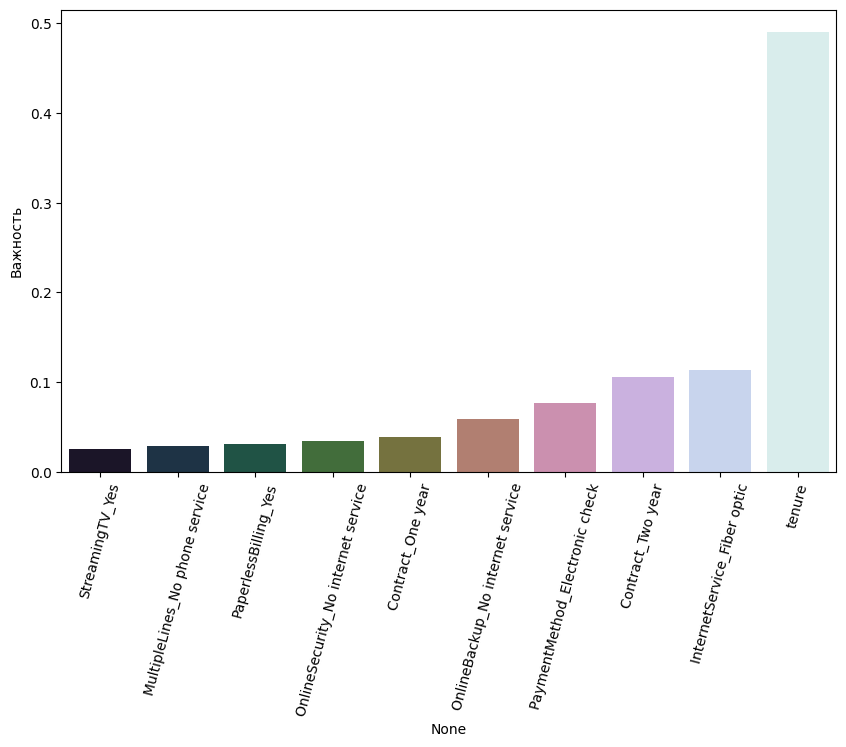

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = imp_feats, y='Важность', x=imp_feats.index, palette='cubehelix')
plt.xticks(rotation=75)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gradient = GradientBoostingClassifier()

In [ ]:
#help(GradientBoostingClassifier)

In [ ]:
# будем использовать grid search

In [ ]:
param_grid = {
    'n_estimators': [50,100],
    'learning_rate':[0.1,0.05,0.2],
    'max_depth':[3,4,5]
}

In [ ]:
gridcv_gradient_model = GridSearchCV(model_gradient, param_grid=param_grid, cv=5)

In [ ]:
gridcv_gradient_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [ ]:
preds_gradient = gridcv_gradient_model.predict(X_test)

In [ ]:
print(classification_report(y_test, preds_gradient))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



In [ ]:
feat_import = pd.DataFrame(gridcv_gradient_model.best_estimator_.feature_importances_, index=X.columns, columns=['Важность'])

In [ ]:
feat_import = feat_import.sort_values(by = 'Важность', ascending=False).head(10)

/tmp/ipython-input-3998437755.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_import_sort, x = feat_import_sort.index, y='Важность', palette='cubehelix')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'tenure'),
  Text(1, 0, 'InternetService_Fiber optic'),
  Text(2, 0, 'PaymentMethod_Electronic check'),
  Text(3, 0, 'Contract_Two year'),
  Text(4, 0, 'Contract_One year'),
  Text(5, 0, 'TotalCharges'),
  Text(6, 0, 'MonthlyCharges'),
  Text(7, 0, 'PaperlessBilling_Yes'),
  Text(8, 0, 'OnlineSecurity_Yes'),
  Text(9, 0, 'OnlineBackup_No internet service')])

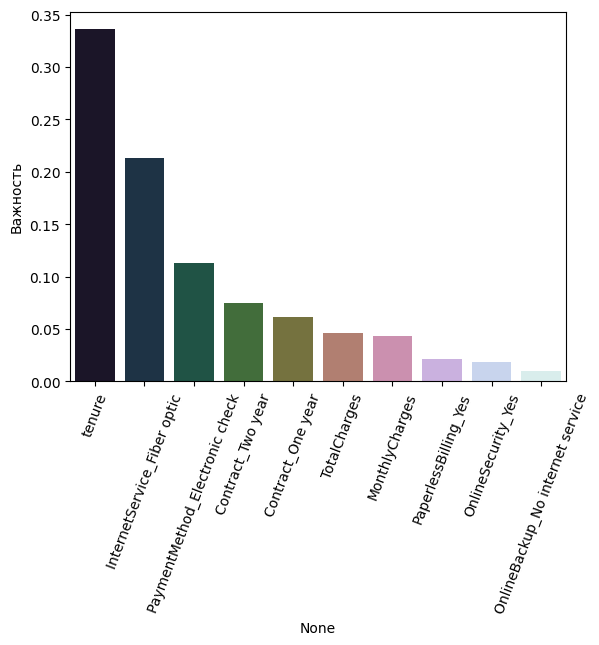

In [ ]:
sns.barplot(data=feat_import_sort, x = feat_import_sort.index, y='Важность', palette='cubehelix')
plt.xticks(rotation = 69)

/tmp/ipython-input-4041454307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = imp_feats, y='Важность', x=imp_feats.index, palette='cubehelix')


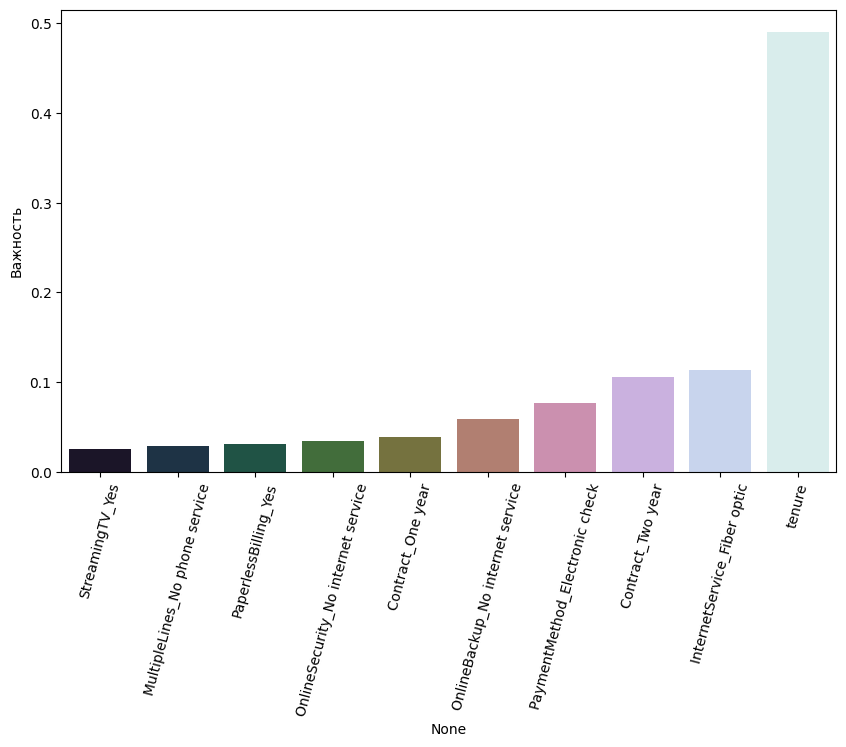

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = imp_feats, y='Важность', x=imp_feats.index, palette='cubehelix')
plt.xticks(rotation=75) ;

Нужно еще метод опорных векторов попробовать все таки для результата и может логистическую регрессию

### Метод опорных векторов - Support Vector Machines

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.svm import SVC

In [ ]:
#help(SVC)

In [ ]:
svc_model = SVC()

In [ ]:
param_grid = {
    'C':[0.1, 1, 10, 100],
    'kernel':['rbf',],
    'gamma':['scale', 'auto', 0.01]
}

In [ ]:
grid_svc = GridSearchCV(svc_model, param_grid=param_grid, cv=5)

In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01], 'kernel': ['rbf']})

In [ ]:
grid_svc.best_estimator_

SVC(C=100)

In [ ]:
preds_svc = grid_svc.predict(X_test)

In [ ]:
print(classification_report(y_test, preds_svc))

              precision    recall  f1-score   support

          No       0.84      0.94      0.89       557
         Yes       0.59      0.33      0.43       147

    accuracy                           0.81       704
   macro avg       0.72      0.64      0.66       704
weighted avg       0.79      0.81      0.79       704



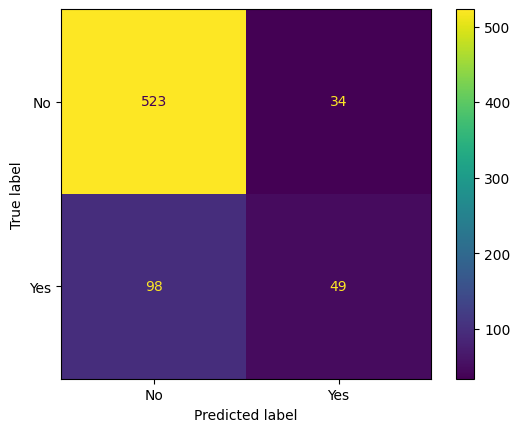

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_svc, X_test, y_test)

## ИТОГ

Очень плохие результаты получились, по-хорошему нужно сидеть и искать лучшие реззультаты. Мои просто позор